In [2]:
from tqdm import tqdm
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib import gridspec
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import geocoder
import datetime
from scipy.stats import norm, describe

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Mounting Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 01: Timeseries Sample

### Loading extracted NTL data

In [73]:
# data_path = "/content/drive/MyDrive/PhD Physics/4.1/Physics 305 - White Noise Analysis/Project/data/NTL_Metro_Manila.csv"

data_path = "../data/NTL_Metro_Manila.csv"

### Read saved CSV file

In [74]:
data = pd.read_csv(data_path, parse_dates=True, index_col = 0)
data

,mean
date,
2012-01-19,37.119045
2012-01-20,46.526066
2012-01-21,31.945523
2012-01-22,29.850017
2012-01-23,28.641234
...,...
2023-06-01,38.685605
2023-06-03,39.992104
2023-06-05,42.730627


### Descriptive statistics

In [75]:
data.describe()

,mean
count,2472.000000
mean,33.624711
std,8.306214
min,0.020395
25%,28.844910
50%,33.824961
75%,38.546441
max,93.628714


### Plotting the timeseries data



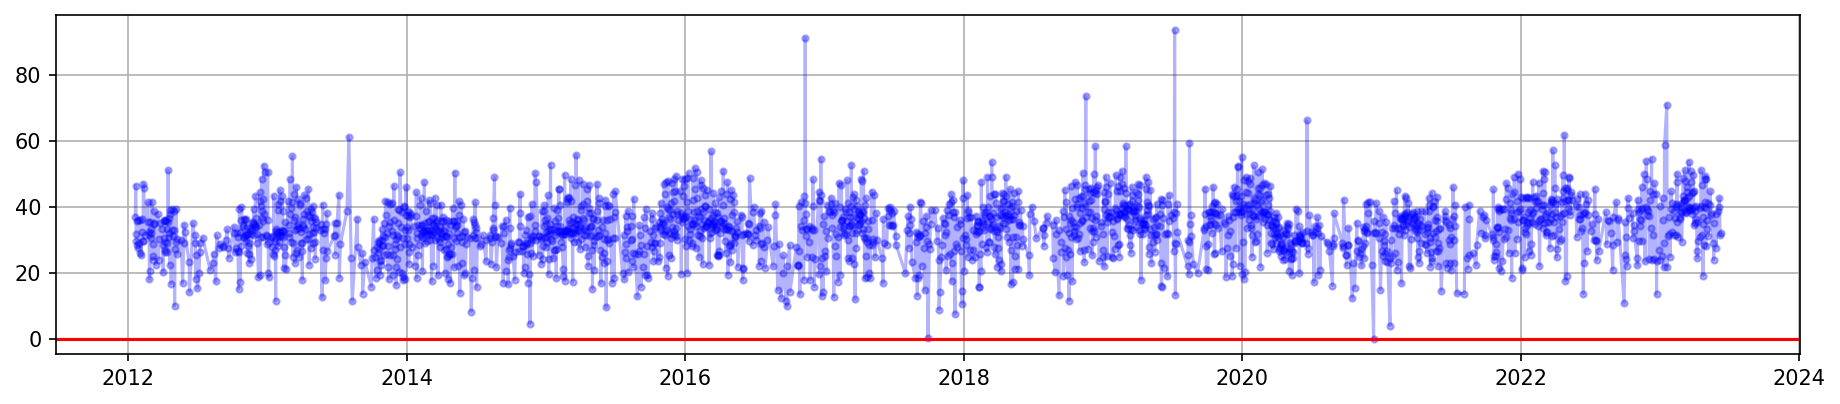

In [76]:
plt.figure(dpi = 150, figsize = (15,3))
plt.grid()
plt.plot(data, 'b.-', alpha = 0.3)
plt.axhline(0, color = 'r')

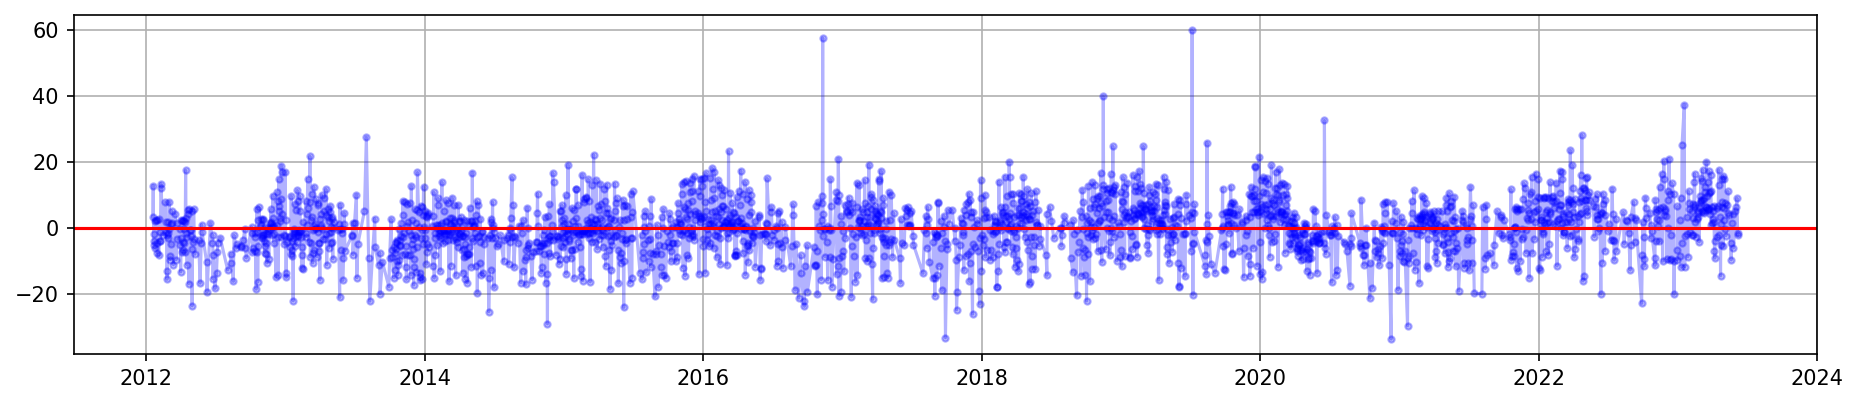

In [77]:
data_mc = data-data.mean()
plt.figure(dpi = 150, figsize = (15,3))
plt.grid()
plt.plot(data_mc, 'b.-', alpha = 0.3)
plt.axhline(0, color = 'r')

## 02: Generate PDF for specific lag time

We select τ - 7 (weekly scale)

In [78]:
tau = 7 #7 days
dt = 1 #1 day interval

delta = int(np.round(tau/dt))
print("tau: %d, Delta: %d" % (tau, delta))

tau: 7, Delta: 7


In [79]:
# get truncated copy of x, ending in initial data point of the last pair
data_trunc = data[:-1*delta]
# get shifted copy of x, starting from end data point of the first pair
data_shift = data[delta:]
# get displacements
dx = data_shift.values - data_trunc.values

In [80]:
len(dx), len(data_trunc), len(data_shift)

(2465, 2465, 2465)

In [81]:
data_trunc.head()

,mean
date,
2012-01-19,37.119045
2012-01-20,46.526066
2012-01-21,31.945523
2012-01-22,29.850017
2012-01-23,28.641234


In [82]:
data_shift.head()

,mean
date,
2012-01-26,36.091626
2012-01-29,28.986071
2012-01-30,35.985483
2012-01-31,26.089090
2012-02-04,25.381150


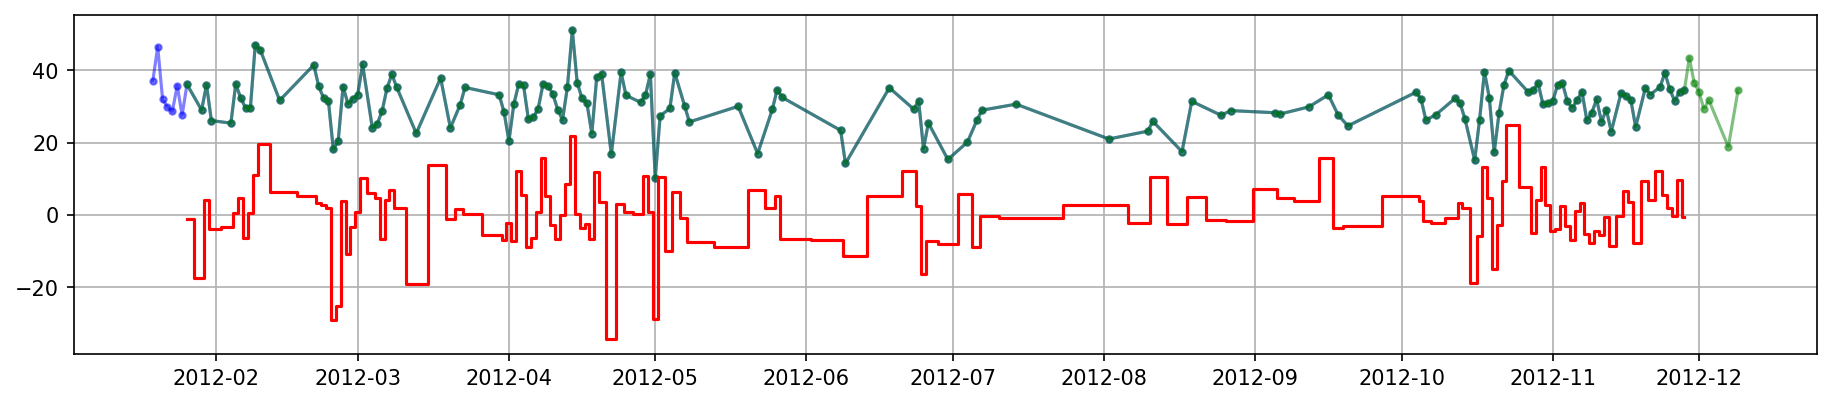

In [83]:
view = 150
plt.figure(dpi = 150, figsize = (15,3))
plt.grid()
plt.plot(data_trunc[:view], 'b.-', alpha = 0.5)
plt.plot(data_shift[:view], 'g.-', alpha = 0.5)
plt.plot(data.index[tau:view], dx[:view-tau], drawstyle = 'steps-mid', color = 'red')

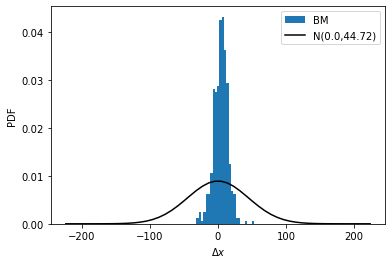

In [103]:
# Generate normal distribution
xx_sd = np.sqrt(tau)
xx = np.linspace(-5, 5)*xx_sd # gridded points from -5 to 5 in units of sd
xx_mean = 0.
yy = norm.pdf(xx, xx_mean, xx_sd)

# Plot PDF of displacements
plt.hist(dx, density=True, bins="auto", label="BM")
plt.xlabel("Delta x")
plt.ylabel("PDF")
# Overlay normal distribution
plt.plot(xx, yy, 'k-', label="N(%.1f,%.2f)" % (xx_mean, xx_sd))
plt.ylabel("PDF")
plt.xlabel(r"$\Delta x$")
plt.legend(loc="best")

In [104]:
tau_vals = np.array([1, 7, 14, 21, 28, 60])
delta_vals = np.round(tau_vals/dt).astype(int)
n = len(data)
n_samp = 1
n_tau = len(tau_vals)
# # initialize array to store displacements
# # note that the size n is larger than the actual number of values to be
# stored
# # values are initialized to NaN (which are not included in the PDF calcu
# lation)
dx_tau = np.empty((n, n_tau))*np.nan
for i, tau in enumerate(tau_vals):
  delta = delta_vals[i]
# get truncated copy of x, ending in initial data point of the last pair
  data_trunc = data[:-1*delta]
# # get shifted copy of x, starting from end data point of the first pair
  data_shift = data[delta:]
# # get displacements
  dx = data_shift.values - data_trunc.values
# # store in output array
  dx_tau[:len(dx), i] = dx.T
# #print(i, tau, delta, len(dx))

In [105]:
# define plotting function
def plot_pdf_bm(dx, tau):
# Generate normal distribution
  xx_mean = 0.
  xx_sd = np.sqrt(tau)
  xx = np.linspace(-5, 5)*xx_sd # gridded points from -5 to 5 in units of sd
  yy = norm.pdf(xx, xx_mean, xx_sd)
  # Plot PDF of displacements
  plt.hist(dx, density=True, bins="auto", label="BM", alpha=0.4)
  plt.xlabel("Delta x")
  plt.ylabel("PDF")
  # Overlay normal distribution
  plt.plot(xx, yy, 'k-', label="N(%.1f,%.2f)" % (xx_mean, xx_sd))
  plt.ylabel("PDF")
  plt.xlabel(r"$\Delta x$")
  #plt.legend(loc="best")
  plt.title(r"$\tau$ = %d days, sd = %.2f" % (tau, xx_sd))

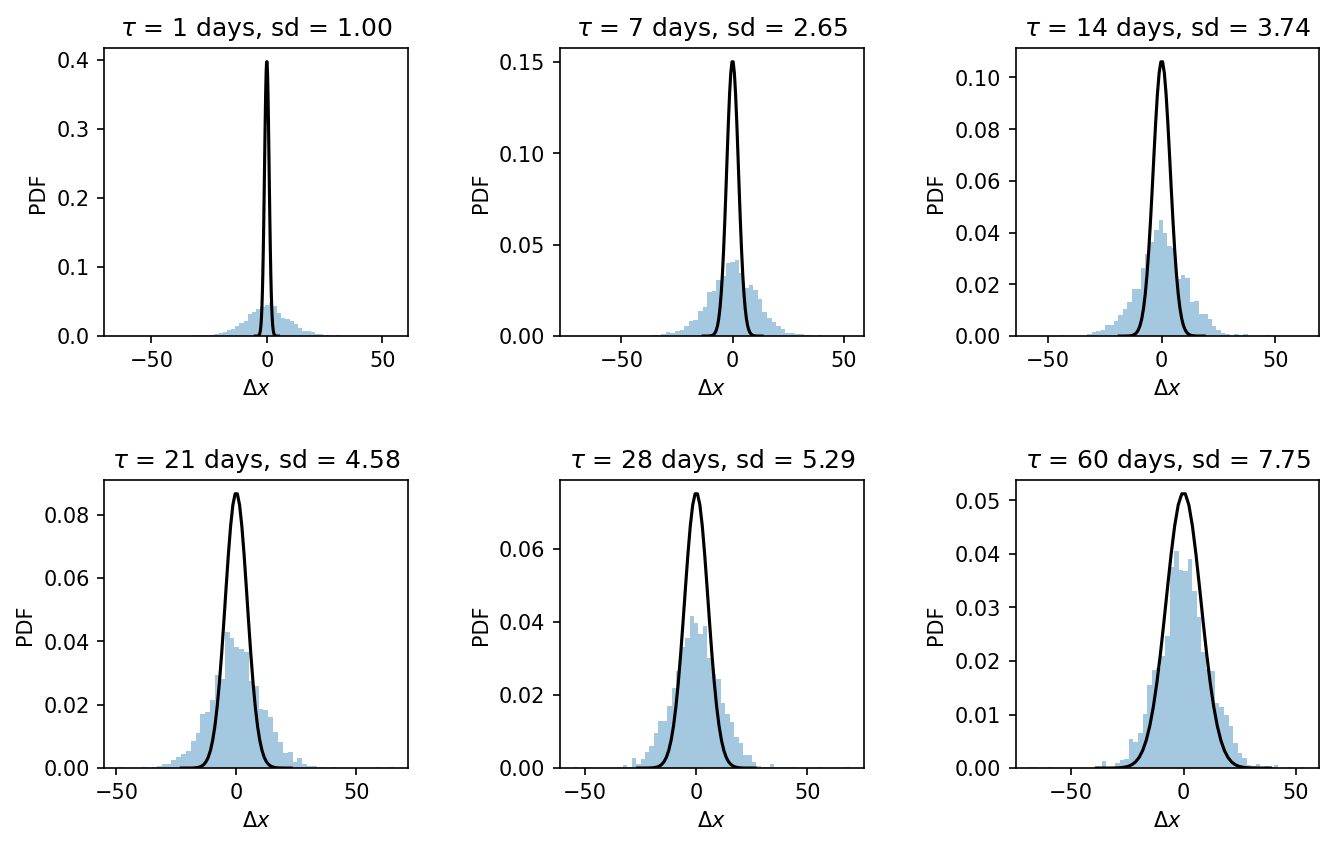

In [106]:
# generate plot for 1 sample

i_samp = 0 # select sample to plot (by index)
plt.figure(figsize=(12,6), dpi = 150)
for i in np.arange(n_tau):
  plt.subplot(2,3,i+1)
  plot_pdf_bm(dx_tau[:,i], tau_vals[i])
  plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5, wspace=
  0.5)

In [88]:
np.log10(10)

1.0

2472

In [115]:
n_tau = len(data)
# n_tau = 100
tau_vals = np.logspace(0,np.log10(n_tau), n_tau)
delta_vals = np.round(tau_vals/dt).astype(int)

n = len(data)
n_samp = 1
n_tau = len(tau_vals)
# # initialize array to store displacements
# # note that the size n is larger than the actual number of values to be
# stored
# # values are initialized to NaN (which are not included in the PDF calcu
# lation)
dx_tau = np.empty((n, n_tau))*np.nan
for i, tau in tqdm(enumerate(tau_vals)):
  delta = delta_vals[i]
# get truncated copy of x, ending in initial data point of the last pair
  data_trunc = data[:-1*delta]
# # get shifted copy of x, starting from end data point of the first pair
  data_shift = data[delta:]
# # get displacements
  dx = data_shift.values - data_trunc.values
# # store in output array
  dx_tau[:len(dx), i] = dx.T
# #print(i, tau, delta, len(dx))

2472it [00:00, 12876.48it/s]


In [116]:
# initialize array to store MSD values
msd_tau = np.empty((n_tau, n_samp))*np.nan
for i, tau in enumerate(tau_vals):
  dx2_sum = np.nansum(dx_tau[:, i]**2) # returns sum treating NaNs as zero
  denom = n-delta_vals[i]
  msd_tau[i, i_samp] = dx2_sum/denom

In [117]:
np.shape(msd_tau)

(2472, 1)

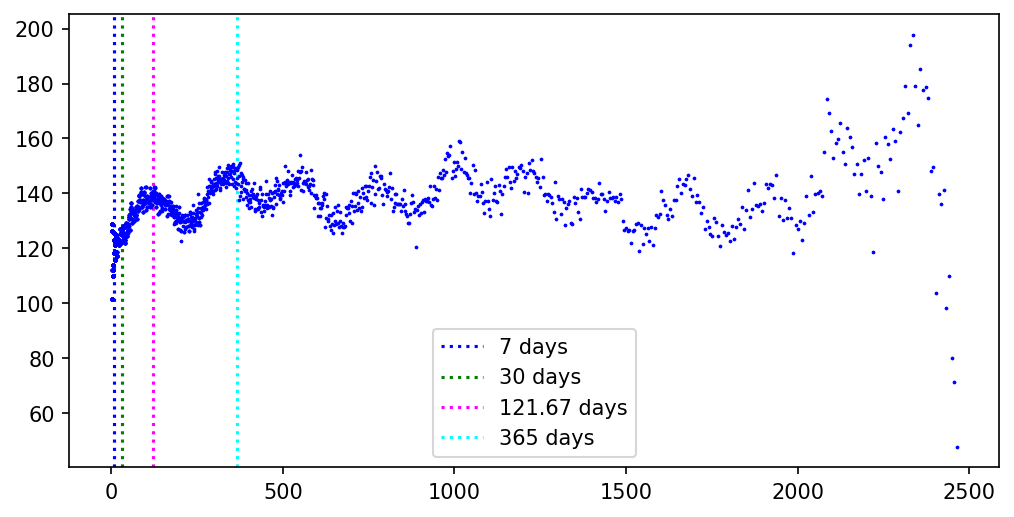

In [118]:
plt.figure(dpi = 150, figsize = (8,4))
# plt.grid()
plt.axvline(7, color='blue', ls=':', label = "7 days")
plt.axvline(30, color='green', ls=':', label = "30 days")
plt.axvline(365/3, color='magenta', ls=':', label = "121.67 days")
plt.axvline(365, color='cyan', ls=':', label = "365 days")
plt.plot(tau_vals, msd_tau, 'bo', ms = 0.8)
plt.legend()

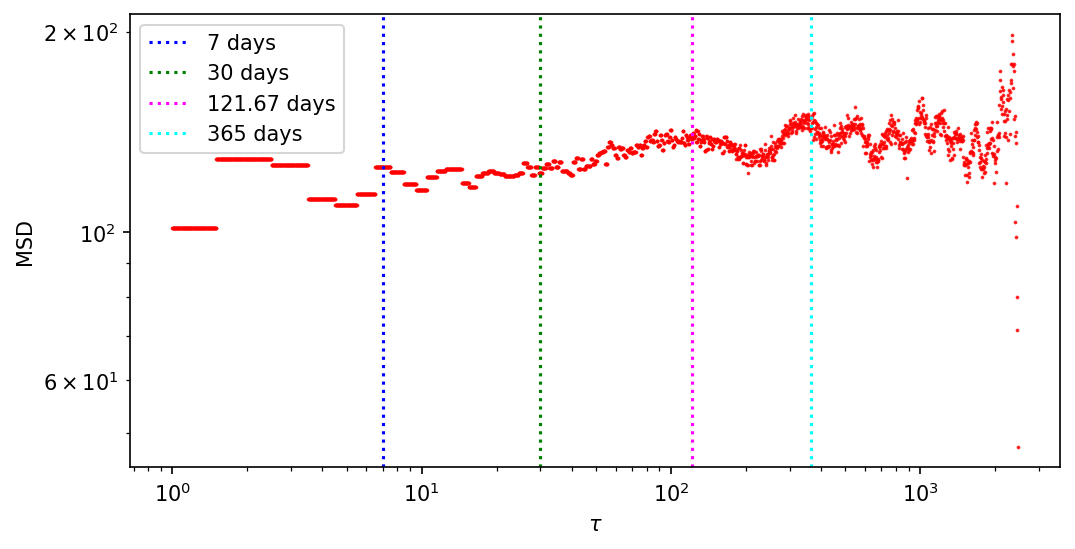

In [119]:
# plot analytical result
plt.figure(dpi = 150, figsize = (8,4))

# plt.grid()
plt.plot(tau_vals, msd_tau, 'ro', alpha = 0.8, ms = 0.8)
# plt.plot(tau_vals, msd_tau, 'k--', alpha = 0.3)
msd_theo = tau_vals
# plt.plot(tau_vals, msd_theo, 'k--')
# plot vertical line at tau=10^3
plt.axvline(7, color='blue', ls=':', label = "7 days")
plt.axvline(30, color='green', ls=':', label = "30 days")
plt.axvline(365/3, color='magenta', ls=':', label = "121.67 days")
plt.axvline(365, color='cyan', ls=':', label = "365 days")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\tau$")
plt.ylabel("MSD")
plt.legend()